In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

names=["sepal_len","sepal_wid","petal_len","petal_wid","class"]
iris = pd.read_csv("../data/iris.data",names=names)

In [2]:
print(iris.head())
print(iris.describe())

   sepal_len  sepal_wid  petal_len  petal_wid        class
0        5.1        3.5        1.4        0.2  Iris-setosa
1        4.9        3.0        1.4        0.2  Iris-setosa
2        4.7        3.2        1.3        0.2  Iris-setosa
3        4.6        3.1        1.5        0.2  Iris-setosa
4        5.0        3.6        1.4        0.2  Iris-setosa
        sepal_len   sepal_wid   petal_len   petal_wid
count  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.054000    3.758667    1.198667
std      0.828066    0.433594    1.764420    0.763161
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1.300000
75%      6.400000    3.300000    5.100000    1.800000
max      7.900000    4.400000    6.900000    2.500000


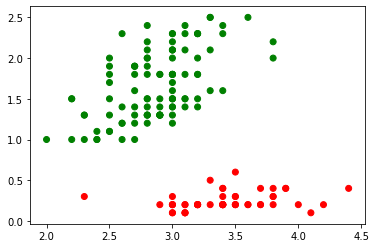

In [3]:
colors = iris['class'].replace(to_replace=['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], value=['red', 'green', 'green'])
plt.scatter(iris["sepal_wid"],iris["petal_wid"],c=colors)

In [4]:
iris['class'].replace(to_replace=['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], value=[+1,-1,-1],inplace=True)
iris.drop(["sepal_len","petal_len"],axis=1,inplace=True)

In [5]:
# def preprocessIris(iris):
#     '''
#         Preprocess iris data including normalization and label transformation, etc.
#     '''
#     features=iris.loc[:,["sepal_len","sepal_wid","petal_len","petal_wid"]]
#     labels=iris.loc[:,["class"]]
#     normalized_features=(features-features.min())/(features.max()-features.min())
#     return pd.concat([normalized_features,labels],axis=1)

# iris=preprocessIris(iris)
# print(iris)

In [6]:
def train_test_split(data, label, ratio=0.8):
    size=len(data)
    index=data.index
    random_index=np.random.permutation(index)
    split_point = int(size*ratio)
    
    train_x=data.loc[random_index[:split_point]].values
    train_y=label.loc[random_index[:split_point]].values
    test_x=data.loc[random_index[split_point:]].values
    test_y=label.loc[random_index[split_point:]].values
    
    return train_x,train_y,test_x,test_y

In [7]:
# features = iris.loc[:,["sepal_len","sepal_wid","petal_len","petal_wid"]]
features = iris.loc[:,["sepal_wid","petal_wid"]]
labels = iris.loc[:,"class"]
train_x,train_y, val_x, val_y = train_test_split(features,labels,0.7)

In [8]:
class Perceptron:
    '''
        Perceptron
    '''
    def __init__(self):
        self.w = None
        self.b = None
        self.errors_ = None
        
    def train(self, train_x,train_y, eta=0.1, epochs = 10):
        self.w = np.zeros(train_x.shape[1])
        self.b = 0
        self.errors_ = []
        
        sample_size = len(train_x)
        for _ in range(epochs):
            error = 0
            for x,y in zip(train_x, train_y):
                res = -y*(np.dot(self.w, x)+ self.b)
                error += res
                
                if res >= 0:# misclassified 
                    self.w = self.w + eta * y * x
                    self.b = self.b + eta * y
            self.errors_.append(error)
            
        print("Training errors:",self.errors_)
        return self
    
    def predict(self, test_x, test_y):
        if self.w is None or self.b is None:
            raise RuntimeError("The model is untrained yet.")
        sample_size = len(test_x)
        correct_num = 0
        for x,y in zip(test_x,test_y):
            pred = y*(np.dot(self.w, x)+ self.b)
            if pred > 0:
                correct_num+=1
        print("The final accuracy is %2f%%" % float(correct_num*100/sample_size))

In [9]:
model = Perceptron()
model.train(train_x, train_y,epochs=5)
model.predict(val_x,val_y)

Training errors: [-16.683000000000007, -15.012000000000004, -15.012000000000004, -15.012000000000004, -15.012000000000004]
The final accuracy is 100.000000%


Text(0, 0.5, 'Loss')

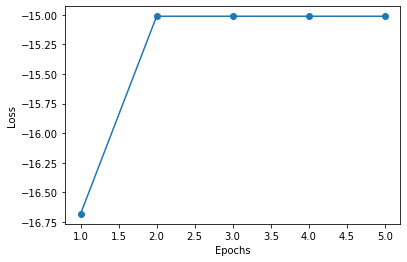

In [10]:
plt.plot(range(1,len(model.errors_) + 1), model.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Loss')
# plt.show()

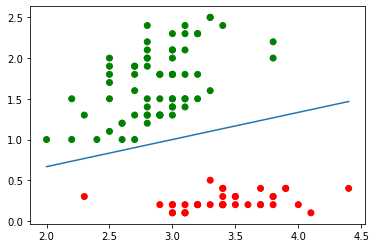

In [11]:
w = -model.w[0]/model.w[1] # w[0] is the weight for sepal_len, w[3] is the weight for petal_wid
b = -model.b/model.w[1]
x1 = [iris["sepal_wid"].min(),iris["sepal_wid"].max()]
x2 = [x1[0]*w+b,x1[1]*w+b]
color = np.where(train_y==1,"red","green")
plt.scatter(train_x[:,0],train_x[:,1],c=color)
plt.plot(x1,x2)